# Patient profile creation

In these code snippets i run an example of how we should create the patients profile.

In [10]:
from pathlib import Path
import pandas as pd
notebook_dir = Path().resolve()
FEATURE_PATH = notebook_dir.parents[1] / "Tasks" / "1" / "Features" 
TESTS_FEATURES_NAME = "laboratory_tests_features.csv"
PROCEDURE_FEATURES_NAME = "procedure_code_features.csv"

tests = pd.read_csv(FEATURE_PATH / TESTS_FEATURES_NAME)
procedures = pd.read_csv(FEATURE_PATH / PROCEDURE_FEATURES_NAME)

In [11]:
tests

,hadm_id,total_tests,n_invalid,n_days_span,perc_invalid
0,20004456,79,40,2,0.506329
1,20007905,188,52,3,0.276596
2,20013519,82,28,2,0.341463
3,20013602,58,10,1,0.172414
4,20014999,272,81,7,0.297794
...,...,...,...,...,...
4746,29991470,66,20,3,0.303030
4747,29995484,159,62,3,0.389937
4748,29996728,432,237,14,0.548611
4749,29998994,40,7,1,0.175000


In [12]:
procedures

,hadm_id,total_procedures,unique_procedures,n_days_span
0,20007905,5,5,1
1,20014999,3,3,0
2,20015927,2,2,0
3,20021932,7,7,0
4,20022560,5,5,0
...,...,...,...,...
3454,29968754,6,6,0
3455,29970039,8,8,9
3456,29986749,7,7,3
3457,29998994,6,6,0


In [13]:
merged_df = pd.merge(
    tests, 
    procedures, 
    on=['hadm_id'],
    how='inner'
)

merged_df

,hadm_id,total_tests,n_invalid,n_days_span_x,perc_invalid,total_procedures,unique_procedures,n_days_span_y
0,20007905,188,52,3,0.276596,5,5,1
1,20014999,272,81,7,0.297794,3,3,0
2,20015927,106,33,4,0.311321,2,2,0
3,20021932,199,87,5,0.437186,7,7,0
4,20022560,122,21,2,0.172131,5,5,0
...,...,...,...,...,...,...,...,...
3451,29968754,65,24,1,0.369231,6,6,0
3452,29970039,719,367,12,0.510431,8,8,9
3453,29986749,176,93,5,0.528409,7,7,3
3454,29998994,40,7,1,0.175000,6,6,0


In [14]:
import numpy as np
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
feature_cols = [col for col in numeric_cols if col not in ['hadm_id', 'subject_id']]
corr_matrix = merged_df[feature_cols].corr()

print(f"Correlation matrix: {corr_matrix.shape}")

Correlation matrix: (7, 7)


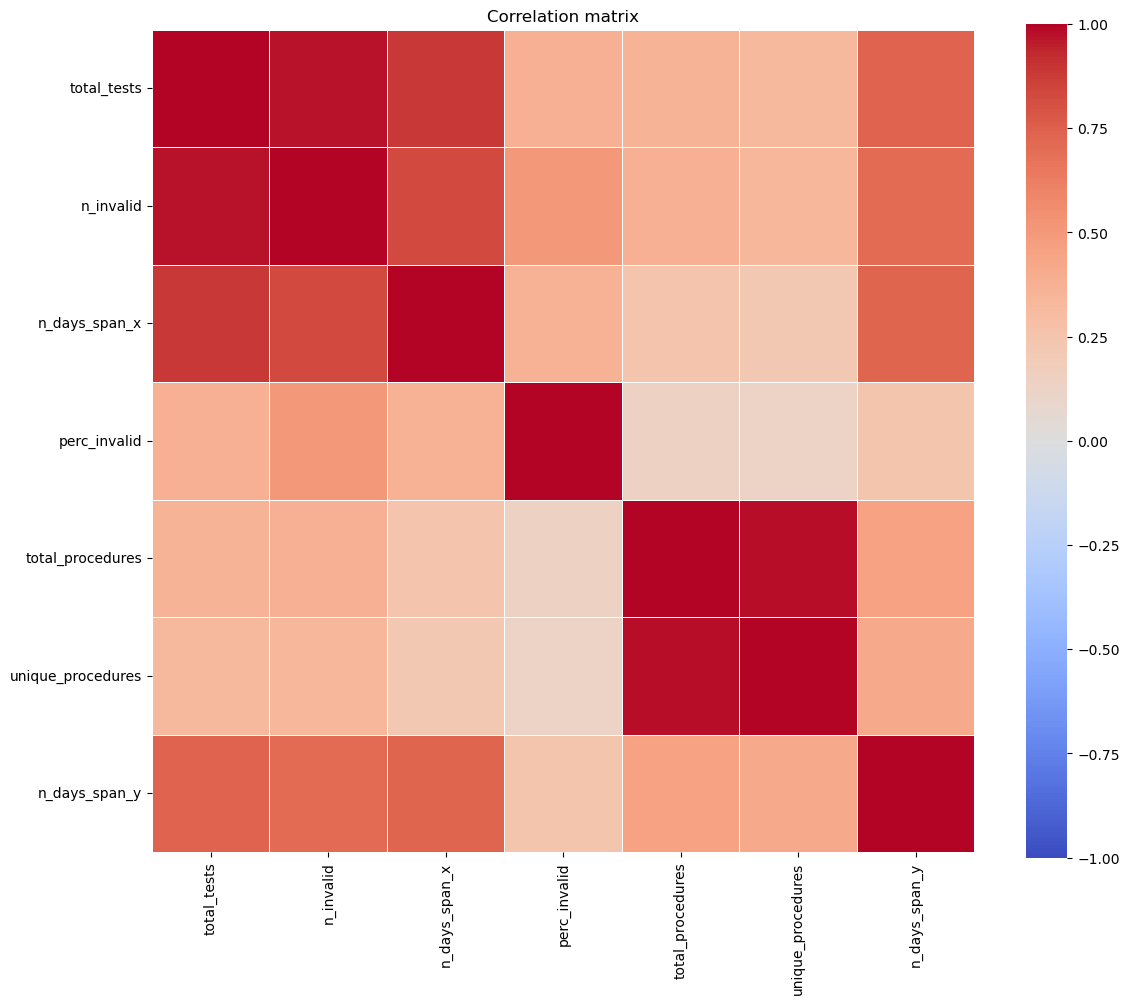

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap base
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=False,  
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5)
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()


As we can see, there are lot of redundant features, so we have to choose which ones to keep and which ones to discard.

In [ ]:
# Trova coppie di feature con alta correlazione
def find_high_correlations(corr_matrix, threshold=0.8):
    """
    Find features pairs with correlation > threshold
    """
    high_corr_pairs = []
    
    # Itera sulla matrice triangolare superiore (evita duplicati)
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i, j]
                })
    
    return pd.DataFrame(high_corr_pairs).sort_values('correlation', 
                                                       key=abs, 
                                                       ascending=False)

# Trova correlazioni > 0.8
high_corr = find_high_correlations(corr_matrix, threshold=0.8)
print(f"\nHighly correlated features (|r| > 0.8):")
print(high_corr)



Feature altamente correlate (|r| > 0.8):
           feature1           feature2  correlation
3  total_procedures  unique_procedures     0.978497
0       total_tests          n_invalid     0.970711
1       total_tests      n_days_span_x     0.889891
2         n_invalid      n_days_span_x     0.834847
